In [1]:
#import pygal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
sns.set(rc={'figure.figsize':(10,10)})

In [2]:
data=pd.read_csv("Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
a=data['Attrition'].sum
print(a)

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object>


In [4]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
atrr=data[data['Attrition']=='Yes']
natrr=data[data['Attrition']=='No']

In [9]:
print(atrr.shape,natrr.shape)

(237, 35) (1233, 35)


In [10]:
print(atrr.shape[0]/natrr.shape[0])

0.1922141119221411


In [11]:
#data.drop(['BusinessTravel','DailyRate','EducationField','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','HourlyRate','MonthlyRate','Over18','OverTime','StandardHours','TrainingTimesLastYear','YearsWithCurrManager'],axis=1,inplace=True)
data.drop('EmployeeNumber',axis=1,inplace=True)

In [12]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2


In [13]:
data.shape

(1470, 34)

In [14]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

In [15]:
data['JobLevel'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

<AxesSubplot:xlabel='Department', ylabel='count'>

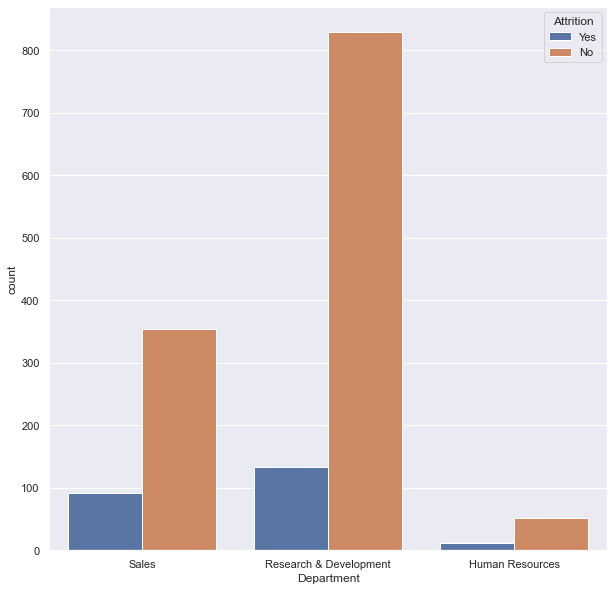

In [16]:
sns.countplot(x='Department',hue='Attrition',data=data)

<AxesSubplot:xlabel='JobRole', ylabel='count'>

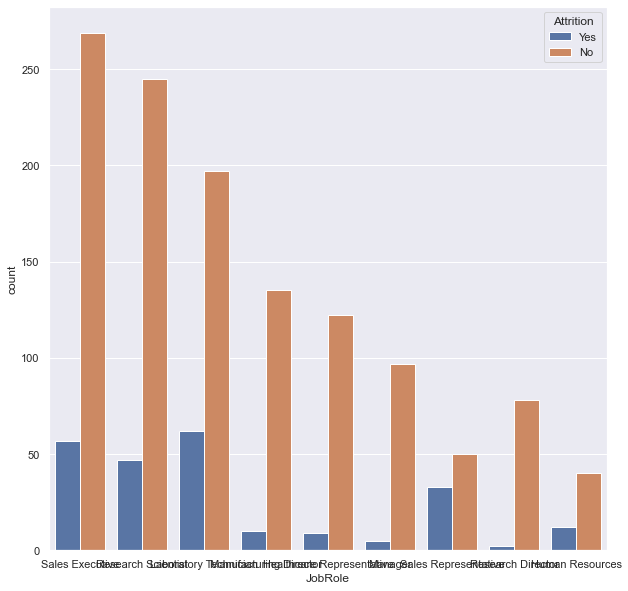

In [17]:
sns.countplot(x='JobRole',hue='Attrition',data=data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

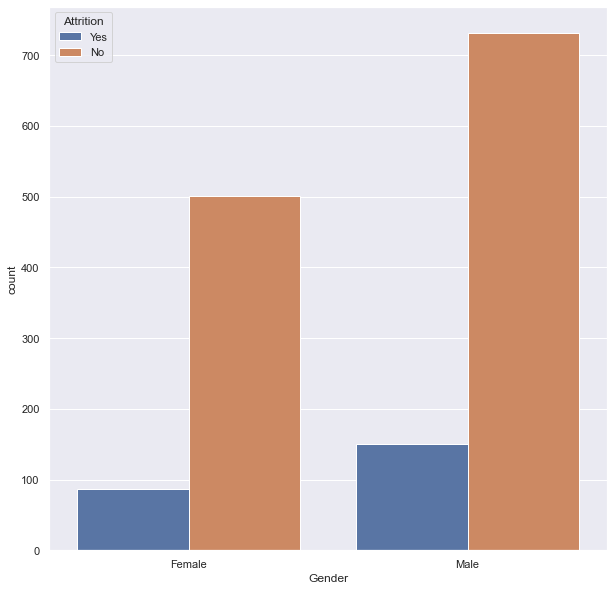

In [18]:
sns.countplot(x='Gender',hue='Attrition',data=data)

<AxesSubplot:xlabel='Education', ylabel='count'>

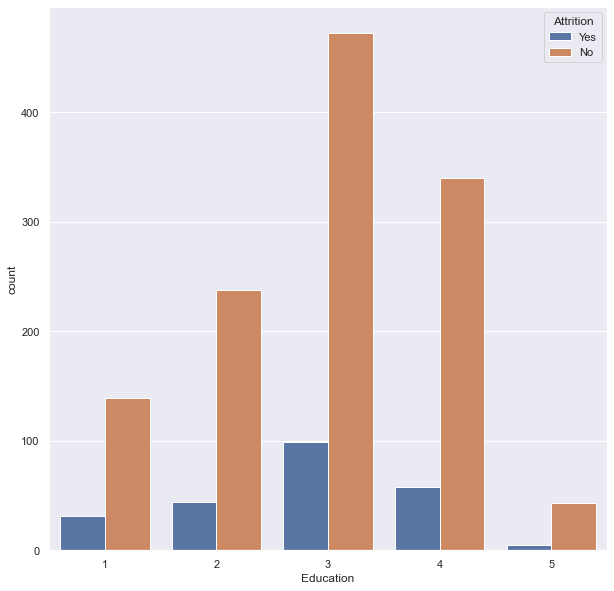

In [19]:
sns.countplot(x='Education',hue='Attrition',data=data)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

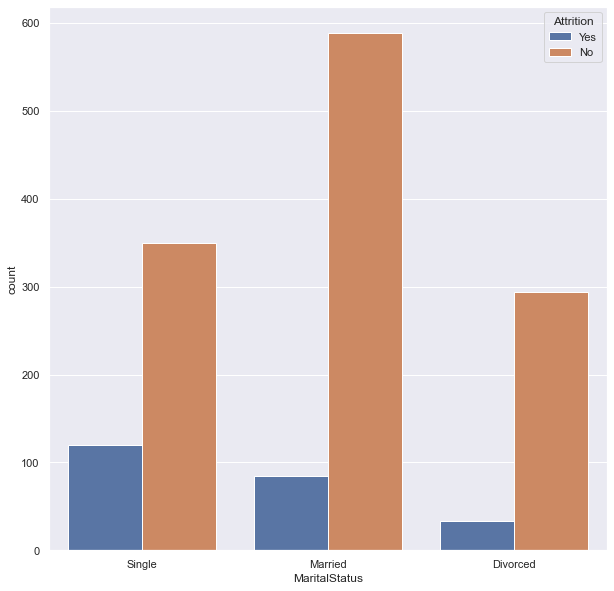

In [20]:
sns.countplot(x='MaritalStatus',hue='Attrition',data=data)

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

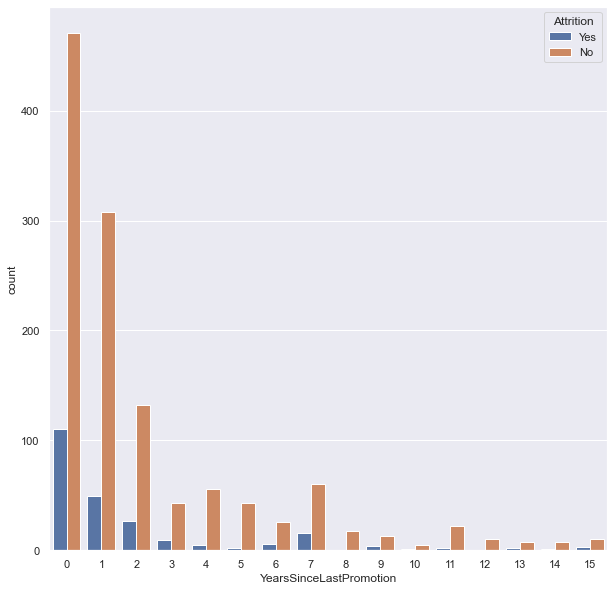

In [21]:
sns.countplot(x='YearsSinceLastPromotion',hue='Attrition',data=data)


<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

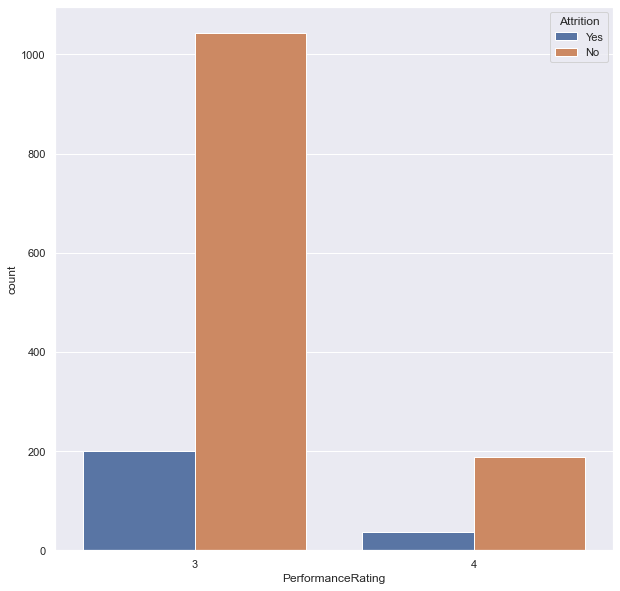

In [22]:
sns.countplot(x='PerformanceRating',hue='Attrition',data=data)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

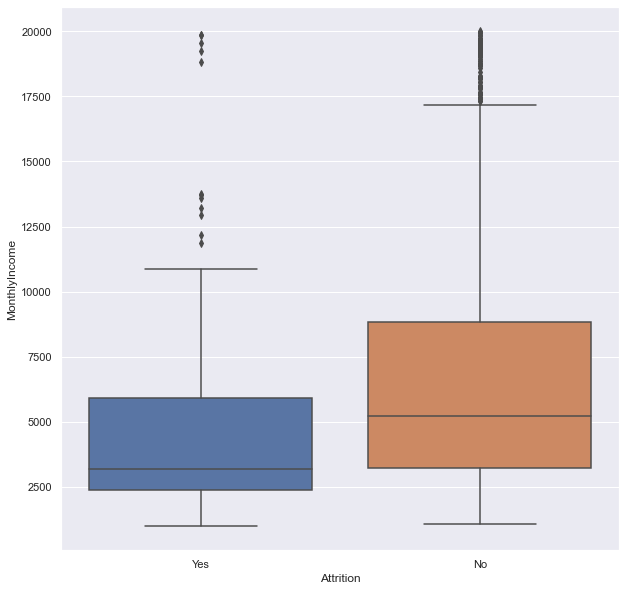

In [23]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data)

In [24]:
def attritioncount(x):
    if x=='Yes':
        return int(1)
    else:
        return int(0)

    

def departmentcount(x):
    dic1={'Human Resources':1,'Research & Development':2,'Sales':3}
    return int(dic1[x])

dic2={'Sales Executive':1,'Research Scientist':2, 'Laboratory Technician':3,
       'Manufacturing Director':4, 'Healthcare Representative':5, 'Manager':6,
       'Sales Representative':7, 'Research Director':8, 'Human Resources':9}
def jobrole(x):
    return int(dic2[x])

def gendercount(x):
    if x=='Male':
        return int(1)
    else:
        return int(0)
    
dic3={'Single':1, 'Married':2, 'Divorced':3}
def marital(x):
    return int(dic3[x])

In [25]:
data['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [26]:
data['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [27]:
data['Attrition']=data['Attrition'].apply(attritioncount)


In [28]:
data['Department']=data['Department'].apply(departmentcount)


In [29]:
data['JobRole']=data['JobRole'].apply(jobrole)
data['Gender']=data['Gender'].apply(gendercount)
data['MaritalStatus']=data['MaritalStatus'].apply(marital)

In [30]:
data.loc[0]

Age                                    41
Attrition                               1
BusinessTravel              Travel_Rarely
DailyRate                            1102
Department                              3
DistanceFromHome                        1
Education                               2
EducationField              Life Sciences
EmployeeCount                           1
EnvironmentSatisfaction                 2
Gender                                  0
HourlyRate                             94
JobInvolvement                          3
JobLevel                                2
JobRole                                 1
JobSatisfaction                         4
MaritalStatus                           1
MonthlyIncome                        5993
MonthlyRate                         19479
NumCompaniesWorked                      8
Over18                                  Y
OverTime                              Yes
PercentSalaryHike                      11
PerformanceRating                 

In [31]:
data.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                   int64
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                       int64
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                      int64
JobSatisfaction              int64
MaritalStatus                int64
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

In [32]:
# import preprocessing from sklearn
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
data = data.apply(le.fit_transform)
data.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,1,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,0,2,...,3,0,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,0,3,...,1,0,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,0,3,...,2,0,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,0,...,3,0,1,6,3,2,2,2,2,2
5,14,0,1,572,1,1,1,1,0,3,...,2,0,0,8,2,1,7,7,3,6
6,41,0,2,770,1,2,2,3,0,2,...,0,0,3,12,3,1,1,0,0,0
7,12,0,2,794,1,23,0,1,0,3,...,1,0,1,1,2,2,1,0,0,0
8,20,0,1,78,1,22,2,1,0,3,...,1,0,0,10,2,2,9,7,1,8
9,18,0,2,751,1,26,2,3,0,2,...,1,0,2,17,3,1,7,7,7,7


Text(0.5, 1.0, 'Correlation between each variable and Attrition Rate \n')

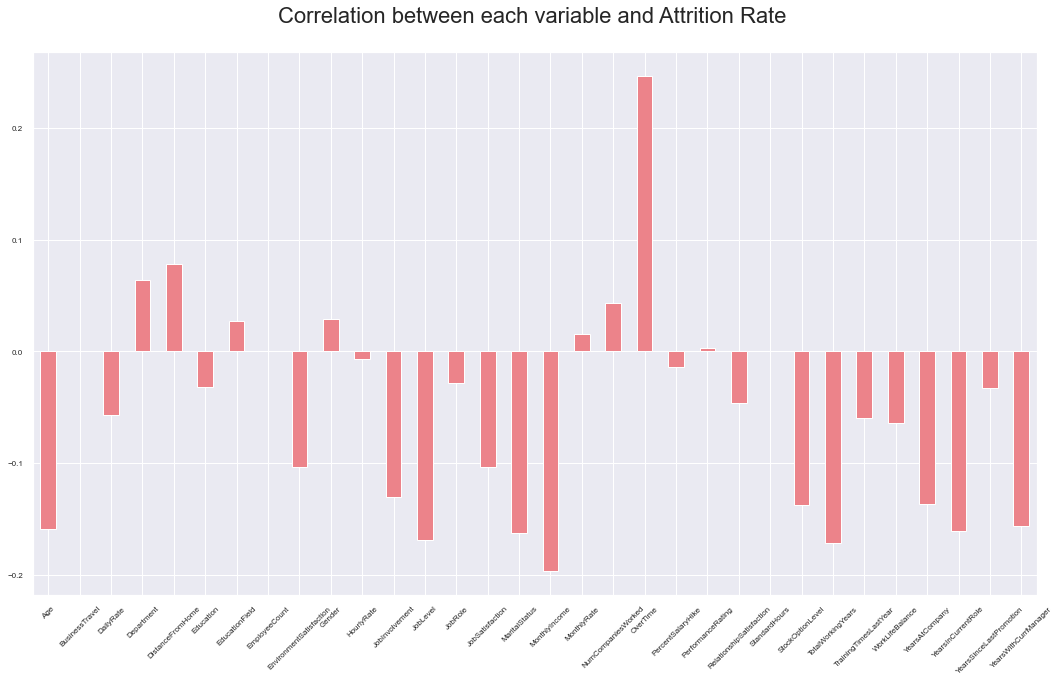

In [33]:
dataset2 = data[['Age','BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
correlations = dataset2.corrwith(data.Attrition)
#correlation between same variables are removed
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 8, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation between each variable and Attrition Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
    for i in range(X.shape[1])]
    return(vif)
calc_vif(dataset2)

C:\Users\music\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,Age,10.705383
1,BusinessTravel,6.370552
2,DailyRate,4.029073
3,Department,7.927586
4,DistanceFromHome,2.017326
5,Education,4.630528
6,EducationField,3.775171
7,EmployeeCount,NaN
8,EnvironmentSatisfaction,3.412185
9,Gender,2.456297


In [35]:
data.drop(['BusinessTravel','DailyRate','EducationField','EmployeeCount','EnvironmentSatisfaction','HourlyRate','MonthlyRate','Over18','OverTime','StandardHours','TrainingTimesLastYear','YearsWithCurrManager'],axis=1,inplace=True)

In [63]:
data.head()

,Age,Attrition,Department,DistanceFromHome,Education,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,23,1,2,0,1,0,2,1,0,3,...,8,0,0,0,0,8,0,6,4,0
1,31,0,1,7,0,1,1,1,1,1,...,1,12,1,3,1,10,2,10,7,1
2,19,1,1,1,1,1,1,0,2,2,...,6,4,0,1,0,7,2,0,0,0
3,15,0,1,2,3,0,2,0,1,2,...,1,0,0,2,0,8,2,8,7,3
4,9,0,1,1,0,1,2,0,2,1,...,9,1,0,3,1,6,2,2,2,2


In [36]:
y=data['Attrition']
X=data.drop('Attrition',axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(X_train, y_train)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [39]:
y_prediction=model.predict(X_test)
print(y_prediction)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [40]:
testscore=model.score(X_test,y_test)
print(testscore)

0.8503401360544217


In [41]:
trainscore=model.score(X_train,y_train)
print(trainscore)

0.8503401360544217


In [42]:
conf_m = confusion_matrix(y_test, y_prediction)
print(conf_m)

[[369  11]
 [ 55   6]]


In [43]:
report = classification_report(y_test, y_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       380
           1       0.35      0.10      0.15        61

    accuracy                           0.85       441
   macro avg       0.61      0.53      0.54       441
weighted avg       0.80      0.85      0.81       441



In [44]:
#x=[[41,3,1,1,0,1,2,1,1,1,5993,5,2,1,1,0,8,1,3,3,0]]
#print(model.predict(x))

In [45]:
clf = RandomForestClassifier(n_estimators = 100)  
clf.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
score2=clf.score(X_test,y_test)
print(score2)

0.8594104308390023


In [47]:
y_pred = clf.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [48]:
#x=[[41,3,1,2,0,3,2,1,4,1,5993,8,11,3,1,0,8,1,6,4,0]]
#print(clf.predict(x))

In [49]:
conf1 = confusion_matrix(y_test, y_pred)
print(conf1)

[[375   5]
 [ 57   4]]


In [50]:
report1 = classification_report(y_test, y_pred)
print(report1)

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       380
           1       0.44      0.07      0.11        61

    accuracy                           0.86       441
   macro avg       0.66      0.53      0.52       441
weighted avg       0.81      0.86      0.81       441



In [51]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
ypre=classifier.predict(X_test)
print(ypre)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [53]:
score3=classifier.score(X_test,y_test)
print(score3)

0.8435374149659864


In [54]:
#x=[[41,3,1,2,0,3,2,1,4,1,5993,8,11,3,1,0,8,1,6,4,0]]
#print(classifier.predict(x))

In [55]:
conf2 = confusion_matrix(y_test, ypre)
print(conf2)

[[368  12]
 [ 57   4]]


In [56]:
report2 = classification_report(y_test, ypre)
print(report2)

              precision    recall  f1-score   support

           0       0.87      0.97      0.91       380
           1       0.25      0.07      0.10        61

    accuracy                           0.84       441
   macro avg       0.56      0.52      0.51       441
weighted avg       0.78      0.84      0.80       441



In [57]:
from sklearn.tree import DecisionTreeClassifier
classifi = DecisionTreeClassifier()
classifi.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
y_pre1 = classifi.predict(X_test)
y_pre1

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [59]:
score3=classifi.score(X_test,y_test)
print(score3)

0.7709750566893424


In [60]:
import pickle
Pkl_Filename = "attr.pkl"  
pickle.dump(model, open(Pkl_Filename, 'wb'))

In [61]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [62]:
score = Pickled_LR_Model.score(X_test, y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_LR_Model.predict(X_test)  

Ypredict

Test score: 85.03 %


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,